<a href="https://colab.research.google.com/github/KhumairahErnas/Tugas3_JST/blob/main/Tugas3_Khumairah_JST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
# Set random seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
# Load and preprocess CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
train_images = train_images.astype("float32") / 255.0
test_images = test_images.astype("float32") / 255.0
train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [ ]:
# Define a function to create and compile a CNN model
def create_model(activation_function):
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation=activation_function, input_shape=(32, 32, 3)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation=activation_function),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation=activation_function),
        layers.Flatten(),
        layers.Dense(64, activation=activation_function),
        layers.Dense(10, activation='softmax') # softmax for output layer
    ])
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [ ]:
# List of activation functions to compare
activation_functions = ['linear', 'sigmoid', 'tanh', 'relu', 'leaky_relu']
result = {}

In [ ]:
# Train and evaluate models with different activation funcions
for activation in activation_functions:
    print(f"\nTraining model with {activation} activation...")

    if activation == 'leaky_relu':
        model = models.Sequential([
            layers.Conv2D(32, (3, 3), input_shape=(32, 32, 3)),
            layers.Activation(tf.keras.layers.LeakyReLU(alpha=0.1)),
            layers.MaxPooling2D((2, 2)),
            layers.Conv2D(64, (3, 3)),
            layers.Activation(tf.keras.layers.LeakyReLU(alpha=0.1)),
            layers.MaxPooling2D((2, 2)),
            layers.Conv2D(64, (3, 3)),
            layers.Activation(tf.keras.layers.LeakyReLU(alpha=0.1)),
            layers.Flatten(),
            layers.Dense(64),
            layers.Activation(tf.keras.layers.LeakyReLU(alpha=0.1)),
            layers.Dense(10, activation='softmax')
        ])
        model.compile(optimizer='adam',
                      loss='categorical_crossentropy',
                      metrics=['accuracy'])

    else:
        model = create_model(activation)


    history = model.fit(train_images, train_labels, epochs=10, batch_size=64,
                        validation_split=0.2, verbose=2)

    test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=0)


Training model with linear activation...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
625/625 - 54s - 87ms/step - accuracy: 0.4715 - loss: 1.5084 - val_accuracy: 0.5554 - val_loss: 1.2946
Epoch 2/10
625/625 - 81s - 129ms/step - accuracy: 0.5729 - loss: 1.2289 - val_accuracy: 0.5914 - val_loss: 1.1949
Epoch 3/10
625/625 - 81s - 130ms/step - accuracy: 0.6063 - loss: 1.1378 - val_accuracy: 0.6054 - val_loss: 1.1507
Epoch 4/10
625/625 - 52s - 83ms/step - accuracy: 0.6299 - loss: 1.0777 - val_accuracy: 0.6193 - val_loss: 1.1277
Epoch 5/10
625/625 - 81s - 129ms/step - accuracy: 0.6469 - loss: 1.0305 - val_accuracy: 0.6261 - val_loss: 1.1170
Epoch 6/10
625/625 - 54s - 87ms/step - accuracy: 0.6621 - loss: 0.9896 - val_accuracy: 0.6311 - val_loss: 1.1057
Epoch 7/10
625/625 - 52s - 84ms/step - accuracy: 0.6766 - loss: 0.9529 - val_accuracy: 0.6309 - val_loss: 1.1069
Epoch 8/10
625/625 - 50s - 80ms/step - accuracy: 0.6877 - loss: 0.9218 - val_accuracy: 0.6286 - val_loss: 1.1198
Epoch 9/10
625/625 - 84s - 134ms/step - accuracy: 0.6965 - loss: 0.8934 - val_accuracy: 0.626

/usr/local/lib/python3.10/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Epoch 1/10
625/625 - 55s - 89ms/step - accuracy: 0.4295 - loss: 1.5705 - val_accuracy: 0.5450 - val_loss: 1.2862
Epoch 2/10
625/625 - 53s - 85ms/step - accuracy: 0.5829 - loss: 1.1801 - val_accuracy: 0.6167 - val_loss: 1.0909
Epoch 3/10
625/625 - 84s - 134ms/step - accuracy: 0.6467 - loss: 1.0084 - val_accuracy: 0.6459 - val_loss: 1.0118
Epoch 4/10
625/625 - 80s - 129ms/step - accuracy: 0.6850 - loss: 0.8990 - val_accuracy: 0.6662 - val_loss: 0.9623
Epoch 5/10
625/625 - 54s - 86ms/step - accuracy: 0.7140 - loss: 0.8179 - val_accuracy: 0.6819 - val_loss: 0.9225
Epoch 6/10
625/625 - 82s - 131ms/step - accuracy: 0.7396 - loss: 0.7493 - val_accuracy: 0.6931 - val_loss: 0.9014
Epoch 7/10
625/625 - 82s - 131ms/step - accuracy: 0.7613 - loss: 0.6884 - val_accuracy: 0.6901 - val_loss: 0.9429
Epoch 8/10
625/625 - 81s - 130ms/step - accuracy: 0.7807 - loss: 0.6349 - val_accuracy: 0.6863 - val_loss: 0.9602
Epoch 9/10
625/625 - 82s - 132ms/step - accuracy: 0.7988 - loss: 0.5824 - val_accuracy: 0.6

In [ ]:
# Store history, loss, accuracy, and confusion matrix
y_pred = model.predict(test_images)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(test_labels, axis=1)
conf_matrix = confusion_matrix(y_true, y_pred_classes)
result[activation] = (history, test_loss, test_acc, conf_matrix)

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step


In [ ]:
# Plot the results for accuracy and loss
plt.figure(figsize=(16, 6))

<Figure size 1600x600 with 0 Axes>

<Figure size 1600x600 with 0 Axes>

Text(0.5, 1.0, 'Training Accuracy for Different Activation Functions on CIFAR-10')

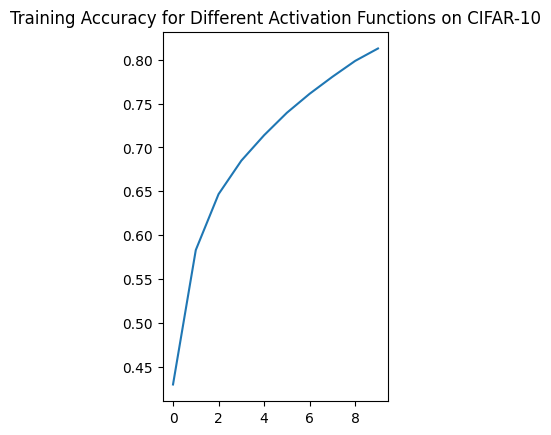

In [ ]:
# Plot training accuracy
plt.subplot(1, 2, 1)
for activation, (history, _, _, _) in result.items():
    plt.plot(history.history['accuracy'], label=f'{activation} (train)')
plt.title('Training Accuracy for Different Activation Functions on CIFAR-10')

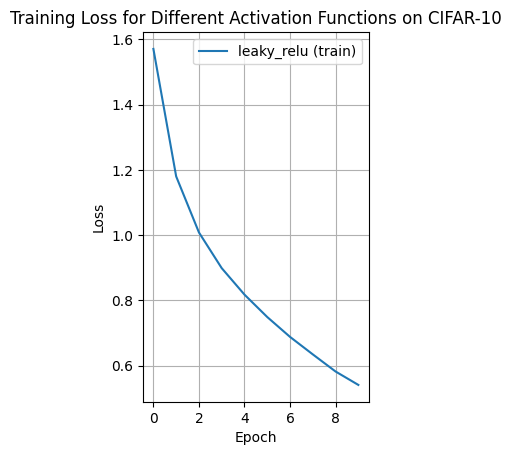

In [ ]:
# Plot training  loss
plt.subplot(1, 2, 2)
for activation, (history, _, _, _) in result.items():
    plt.plot(history.history['loss'], label=f'{activation} (train)')
plt.title('Training Loss for Different Activation Functions on CIFAR-10')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.grid(True)
plt.show()


Test accuracy with leaky_relu: 0.6951


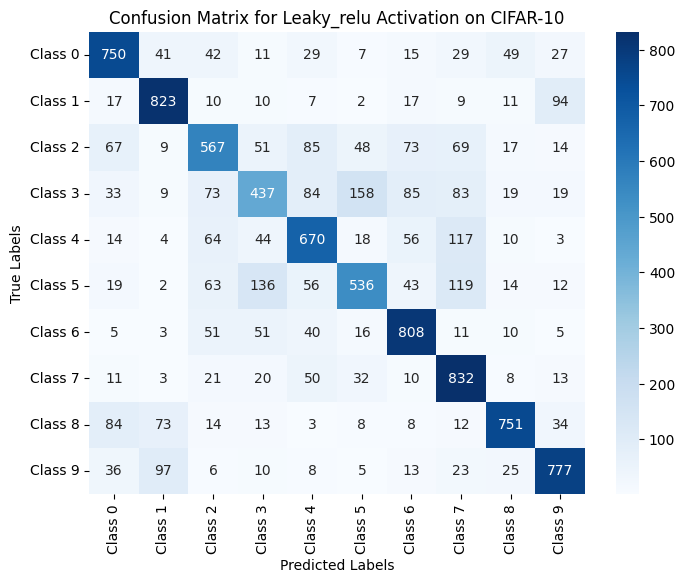

In [ ]:
# Display confusion matrix for each activation function
for activation, (_, _, test_acc, conf_matrix) in result.items():
    print(f'\nTest accuracy with {activation}: {test_acc:.4f}')
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
                xticklabels=[f'Class {i}' for i in range(10)],
                yticklabels=[f'Class {i}' for i in range(10)])
    plt.title(f'Confusion Matrix for {activation.capitalize()} Activation on CIFAR-10')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()